Epoch 1/5
293/293 [==============================] - 383s 1s/step - loss: 1.4385 - acc: 0.4695 - val_loss: 0.8606 - val_acc: 0.5033
Epoch 2/5
293/293 [==============================] - 487s 2s/step - loss: 0.8351 - acc: 0.5217 - val_loss: 0.8388 - val_acc: 0.5110
Epoch 3/5
293/293 [==============================] - 524s 2s/step - loss: 0.7808 - acc: 0.5633 - val_loss: 0.8433 - val_acc: 0.5080
Epoch 4/5
293/293 [==============================] - 515s 2s/step - loss: 0.6903 - acc: 0.6557 - val_loss: 0.9075 - val_acc: 0.4972
Epoch 5/5
782/782 [==============================] - 45s 58ms/step - loss: 1.0349 - acc: 0.4906
Evaluation result on Train Data : Loss = 1.0349431037902832, accuracy = 0.49059998989105225


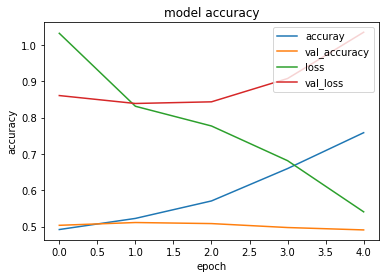

C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Prediction 2 Predicted Prediction [1]


In [9]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/Administrator/PycharmProjects/pythonProject2/ML3/code/imdb_master.csv',encoding='latin-1')
sentences = df['review'].values
y = df['label'].values
max_review_len= max([len(s.split()) for s in sentences])

#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)


#getting the vocabulary of data
#sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)
#evaluating model on training data and calculating loss and accuracy of training data
[train_loss, train_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))
# summarize history for accuracy&loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

# Predicting the Value for test sample
pred = model.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)